In [5]:
import matplotlib.pyplot as plt
import mlflow
import pandas as pd
import seaborn as sns

In [7]:
def plot_benchmarking_metrics(fig_title,
                              df,
                              y_col_name,
                              save_fig=False,
                              save_dir="../figures",
                              file_name="benchmarking_metrics.png"):
    fig, axes = plt.subplots(3, 2, sharey=True, figsize=(10, 10))
    fig.suptitle(fig_title)
    
    # Graph Connectivity Distance
    sns.boxplot(data=df, ax=axes[0, 0], x="gcd", y=y_col_name)
    axes[0, 0].set_title("GCD")

    # Maximum Leiden Normalized Mutual Info
    sns.boxplot(data=df, ax=axes[0, 1], x="mlnmi", y=y_col_name)
    axes[0, 1].set_title("MLNMI")

    # Cell-Type Affinity Distance
    sns.boxplot(data=df, ax=axes[1, 0], x="cad", y=y_col_name)
    axes[1, 0].set_title("CAD")

    # Average Absolute Log Relative Cell-Type Local Inverse Simpson's Index
    sns.boxplot(data=df, ax=axes[1, 1], x="arclisi", y=y_col_name)
    axes[1, 1].set_title("ARCLISI")

    # Cell Classification Accuracy
    sns.boxplot(data=df, ax=axes[2, 0], x="cca", y=y_col_name)
    axes[2, 0].set_title("CCA")

    # Gene Expression Regression Mean Squared Error
    sns.boxplot(data=df, ax=axes[2, 1], x="germse", y=y_col_name)
    axes[2, 1].set_title("GERMSE")

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.4)
    if save_fig:
        # Get time for timestamping saved artefacts
        now = datetime.now()
        current_timestamp = now.strftime("%d%m%Y_%H%M%S")

        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(f"{save_dir}/{file_name}_{current_timestamp}.png",
                    bbox_inches='tight')

In [8]:
experiment_name = "benchmark_loss_weights"

runs = mlflow.search_runs(experiment_names=[experiment_name],
                          output_format="list")

data = []
for run in runs:
    data.append({**run.data.metrics, **run.data.params})
df = pd.DataFrame.from_dict(data)

In [54]:
def get_loss_weights(row):  
    return f"edge_{row['lambda_edge_recon_']}_+_gene_expr_{row['lambda_gene_expr_recon_']}"

df["loss_weights"] = df.apply(lambda row: get_loss_weights(row), axis=1)

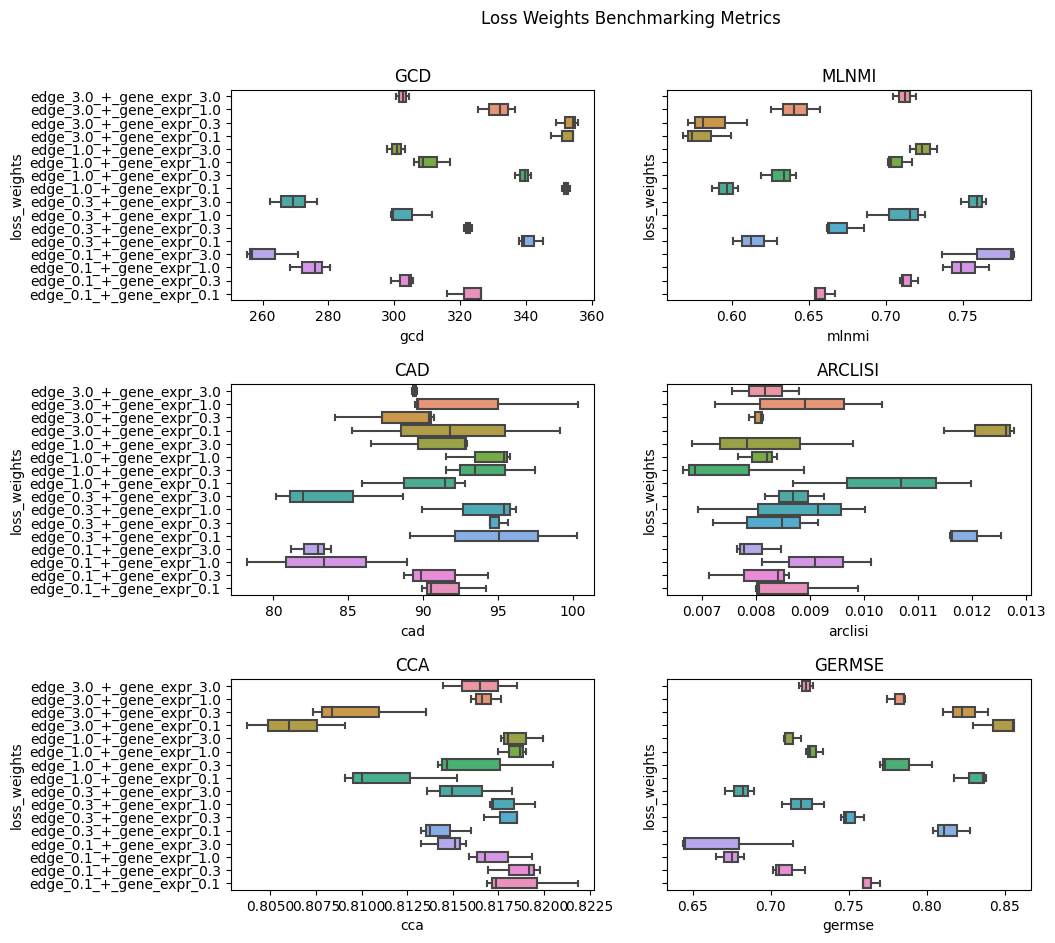

In [55]:
plot_benchmarking_metrics(fig_title="Loss Weights Benchmarking Metrics",
                          df=df,
                          y_col_name="loss_weights",
                          save_fig=False)

<AxesSubplot: xlabel='test_best_acc_score', ylabel='loss_weights'>

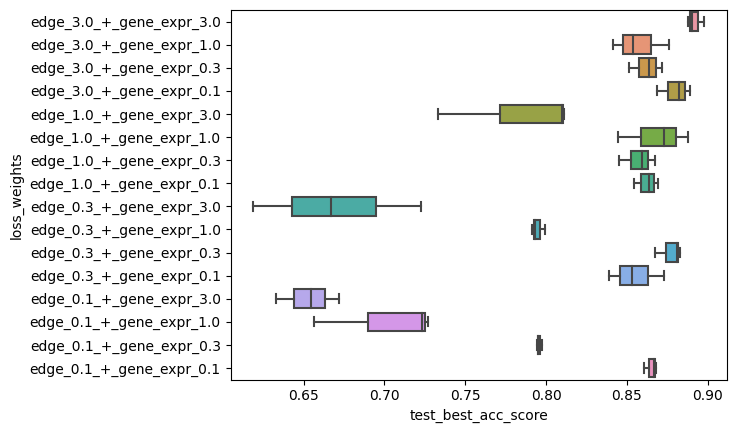

In [56]:
sns.boxplot(data=df, x="test_best_acc_score", y="loss_weights")

In [3]:
def get_recon_loss_inclusion(row):  
    if row["include_edge_recon_loss_"] == "True" and row["include_gene_expr_recon_loss_"] == "True":
        return "edge_+_gene_expr"
    elif row["include_edge_recon_loss_"] == "True" and row["include_gene_expr_recon_loss_"] == "False":
        return "only_edge"
    elif row["include_edge_recon_loss_"] == "False" and row["include_gene_expr_recon_loss_"] == "True":
        return "only_gene_expr"
    return "none"

df["recon_loss_inclusions"] = df.apply(lambda row: get_recon_loss_inclusion(row), axis=1)

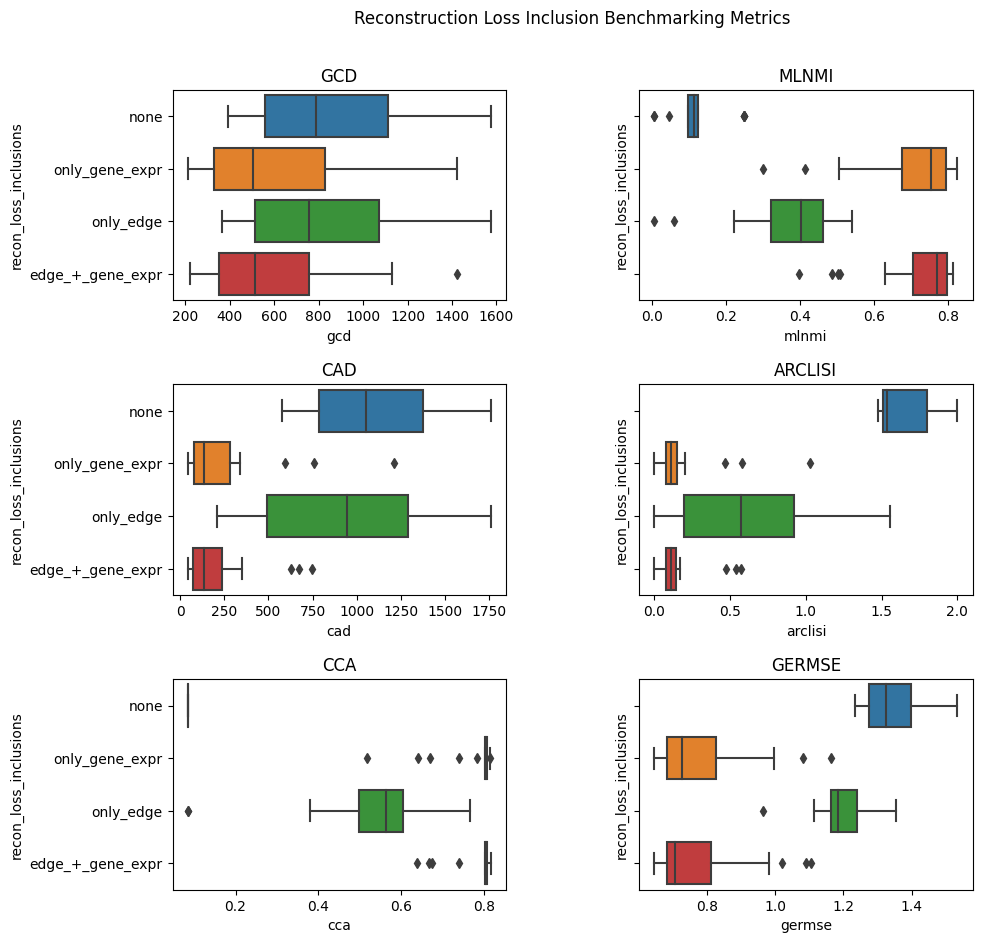

In [6]:
fig, axes = plt.subplots(3, 2, sharey=True, figsize=(10, 10))
fig.suptitle("Reconstruction Loss Inclusion Benchmarking Metrics")

# Graph Connectivity Distance
sns.boxplot(data=df, ax=axes[0, 0], x="gcd", y="recon_loss_inclusions")
axes[0, 0].set_title("GCD")

# Maximum Leiden Normalized Mutual Info
sns.boxplot(data=df, ax=axes[0, 1], x="mlnmi", y="recon_loss_inclusions")
axes[0, 1].set_title("MLNMI")

# Cell-Type Affinity Distance
sns.boxplot(data=df, ax=axes[1, 0], x="cad", y="recon_loss_inclusions")
axes[1, 0].set_title("CAD")

# Average Absolute Log Relative Cell-Type Local Inverse Simpson's Index
sns.boxplot(data=df, ax=axes[1, 1], x="arclisi", y="recon_loss_inclusions")
axes[1, 1].set_title("ARCLISI")

# Cell Classification Accuracy
sns.boxplot(data=df, ax=axes[2, 0], x="cca", y="recon_loss_inclusions")
axes[2, 0].set_title("CCA")

# Gene Expression Regression Mean Squared Error
sns.boxplot(data=df, ax=axes[2, 1], x="germse", y="recon_loss_inclusions")
axes[2, 1].set_title("GERMSE")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [17]:
experiment_name = "benchmark_gene_expr_recon"

runs = mlflow.search_runs(experiment_names=[experiment_name],
                          output_format="list")

data = []
for run in runs:
    data.append({**run.data.metrics, **run.data.params})
df = pd.DataFrame.from_dict(data)

In [18]:
def get_gene_expr_recon_components(row):  
    if row["node_label_method_"] == "self" and row["conv_layer_encoder_"] == "gcnconv":
        return "self_+_nb"
    elif row["node_label_method_"] == "self" and row["gene_expr_recon_dist_"] == "zinb":
        return "self_+_zinb"
    elif row["node_label_method_"] == "one-hop-sum" and row["gene_expr_recon_dist_"] == "nb":
        return "one-hop-sum_+_nb"
    elif row["node_label_method_"] == "one-hop-sum" and row["gene_expr_recon_dist_"] == "zinb":
        return "one-hop-sum_+_zinb"
    elif row["node_label_method_"] == "one-hop-norm" and row["gene_expr_recon_dist_"] == "nb":
        return "one-hop-norm_+_nb"
    elif row["node_label_method_"] == "one-hop-norm" and row["gene_expr_recon_dist_"] == "zinb":
        return "one-hop-norm_+_zinb"
    elif row["node_label_method_"] == "one-hop-attention" and row["gene_expr_recon_dist_"] == "nb":
        return "one-hop-attention_+_nb"
    return "one-hop-attention_+_zinb"

df["gene_expr_recon_components"] = df.apply(lambda row: get_gene_expr_recon_components(row), axis=1)

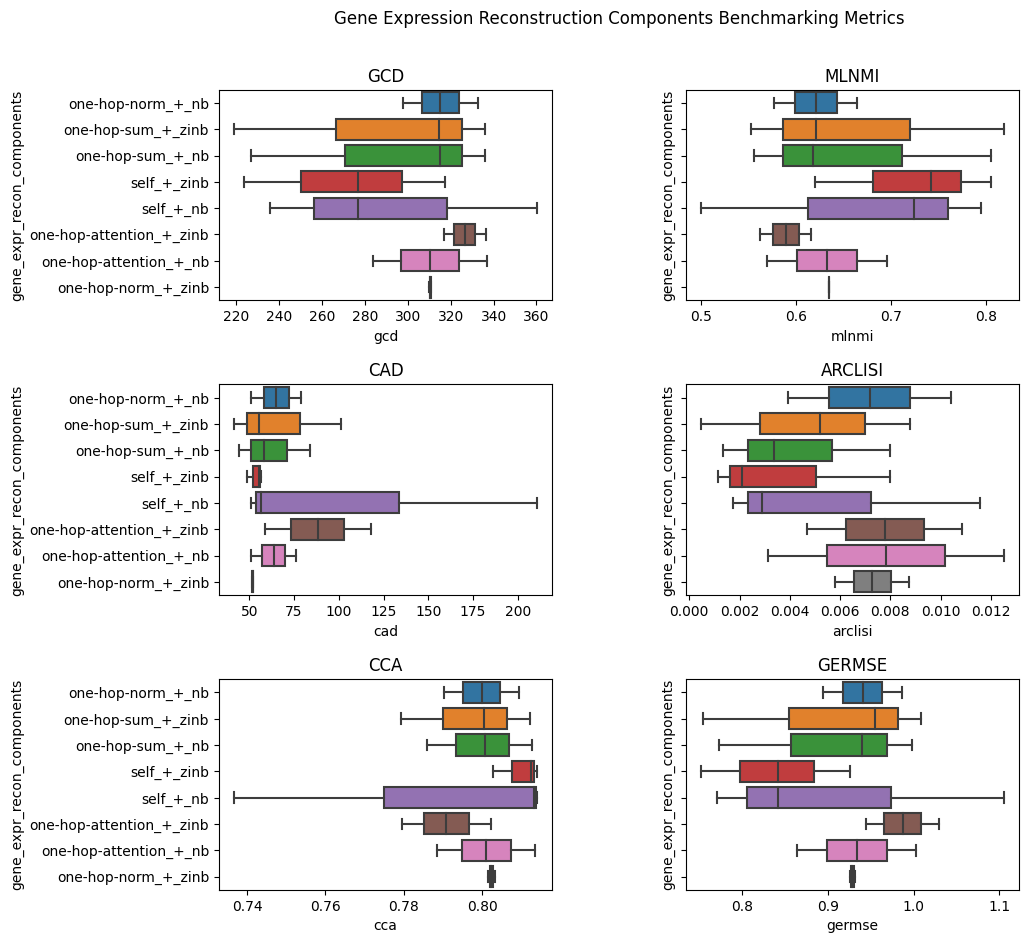

In [ ]:
fig, axes = plt.subplots(3, 2, sharey=True, figsize=(10, 10))
fig.suptitle("Gene Expression Reconstruction Components Benchmarking Metrics")

# Graph Connectivity Distance
sns.boxplot(data=df, ax=axes[0, 0], x="gcd", y="gene_expr_recon_components")
axes[0, 0].set_title("GCD")

# Maximum Leiden Normalized Mutual Info
sns.boxplot(data=df, ax=axes[0, 1], x="mlnmi", y="gene_expr_recon_components")
axes[0, 1].set_title("MLNMI")

# Cell-Type Affinity Distance
sns.boxplot(data=df, ax=axes[1, 0], x="cad", y="gene_expr_recon_components")
axes[1, 0].set_title("CAD")

# Average Absolute Log Relative Cell-Type Local Inverse Simpson's Index
sns.boxplot(data=df, ax=axes[1, 1], x="arclisi", y="gene_expr_recon_components")
axes[1, 1].set_title("ARCLISI")

# Cell Classification Accuracy
sns.boxplot(data=df, ax=axes[2, 0], x="cca", y="gene_expr_recon_components")
axes[2, 0].set_title("CCA")

# Gene Expression Regression Mean Squared Error
sns.boxplot(data=df, ax=axes[2, 1], x="germse", y="gene_expr_recon_components")
axes[2, 1].set_title("GERMSE")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [45]:
def plot_benchmarking_metrics(fig_title,
                              df,
                              y_col_name,
                              save_fig=False,
                              save_dir="../figures",
                              file_name="benchmarking_metrics.png"):
    fig, axes = plt.subplots(3, 2, sharey=True, figsize=(10, 10))
    fig.suptitle(fig_title)
    
    # Graph Connectivity Distance
    sns.boxplot(data=df, ax=axes[0, 0], x="gcd", y=y_col_name)
    axes[0, 0].set_title("GCD")

    # Maximum Leiden Normalized Mutual Info
    sns.boxplot(data=df, ax=axes[0, 1], x="mlnmi", y=y_col_name)
    axes[0, 1].set_title("MLNMI")

    # Cell-Type Affinity Distance
    sns.boxplot(data=df, ax=axes[1, 0], x="cad", y=y_col_name)
    axes[1, 0].set_title("CAD")

    # Average Absolute Log Relative Cell-Type Local Inverse Simpson's Index
    sns.boxplot(data=df, ax=axes[1, 1], x="arclisi", y=y_col_name)
    axes[1, 1].set_title("ARCLISI")

    # Cell Classification Accuracy
    sns.boxplot(data=df, ax=axes[2, 0], x="cca", y=y_col_name)
    axes[2, 0].set_title("CCA")

    # Gene Expression Regression Mean Squared Error
    sns.boxplot(data=df, ax=axes[2, 1], x="germse", y=y_col_name)
    axes[2, 1].set_title("GERMSE")

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.4)
    if save_fig:
        # Get time for timestamping saved artefacts
        now = datetime.now()
        current_timestamp = now.strftime("%d%m%Y_%H%M%S")

        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(f"{save_dir}/{file_name}_{current_timestamp}.png",
                    bbox_inches='tight')

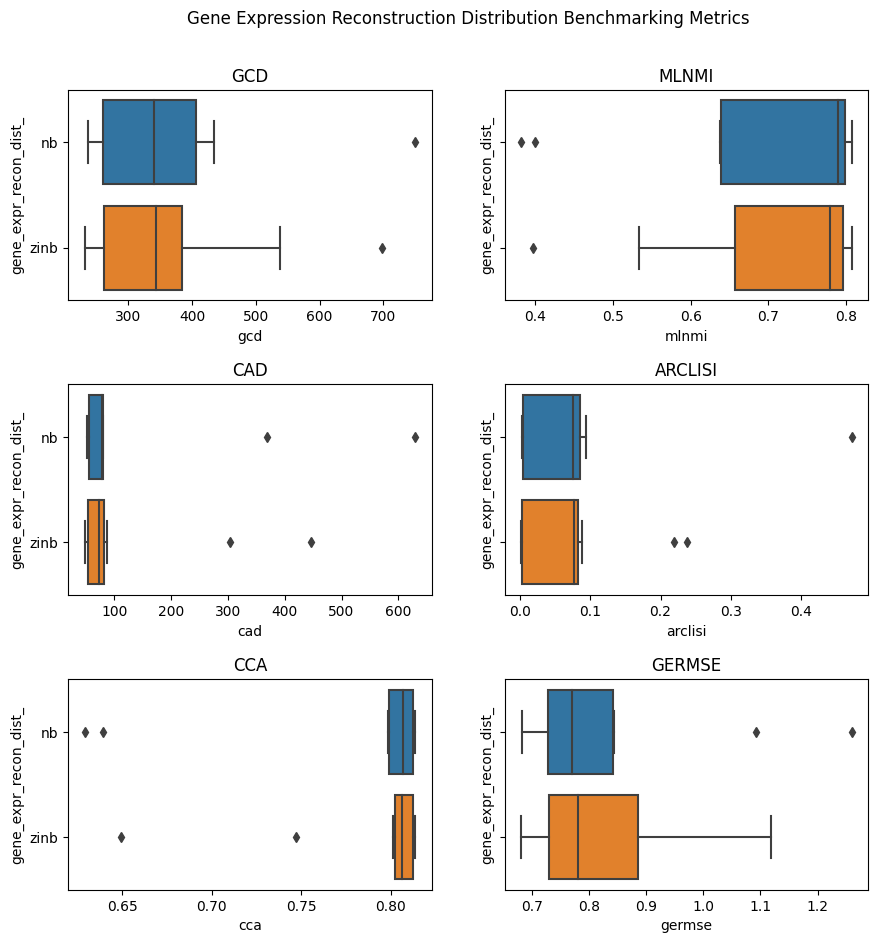

In [46]:
plot_benchmarking_metrics(fig_title="Gene Expression Reconstruction Distribution Benchmarking Metrics",
                          df=df,
                          y_col_name="gene_expr_recon_dist_",
                          save_fig=False)

In [22]:
experiment_name = "benchmark_conv_layer_encoder"

runs = mlflow.search_runs(experiment_names=[experiment_name],
                          output_format="list")

data = []
for run in runs:
    data.append({**run.data.metrics, **run.data.params})
df = pd.DataFrame.from_dict(data)

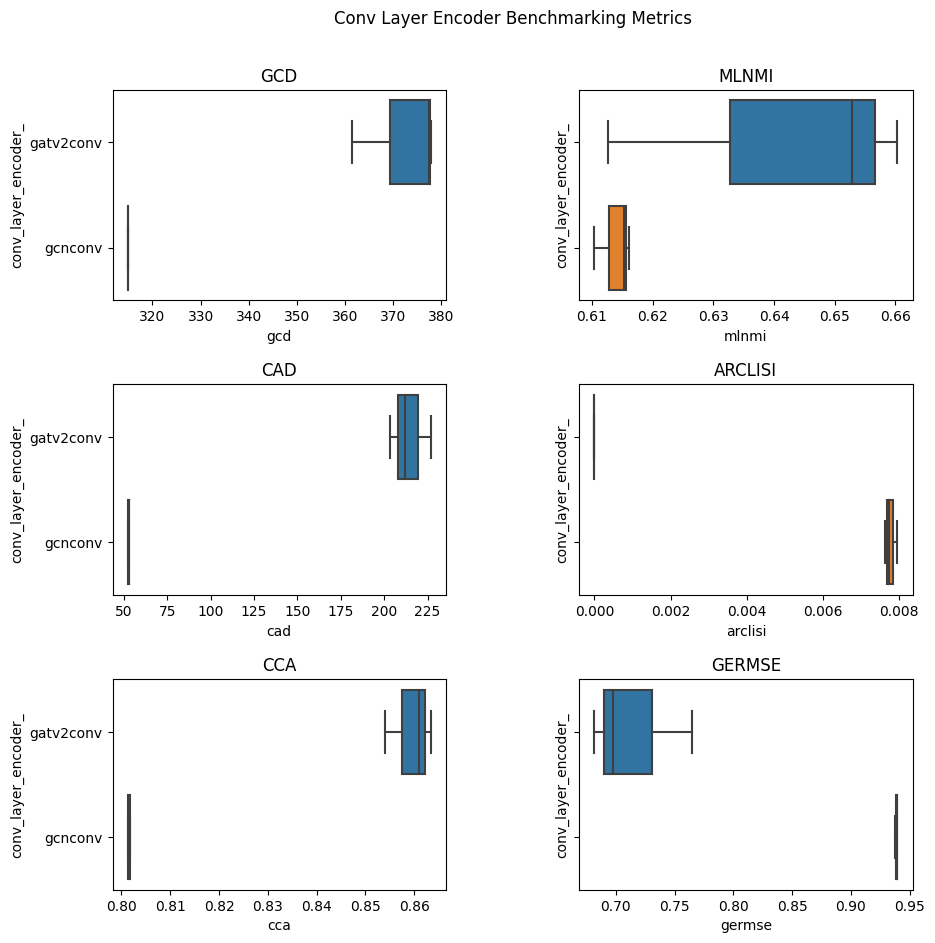

In [23]:
fig, axes = plt.subplots(3, 2, sharey=True, figsize=(10, 10))
fig.suptitle("Conv Layer Encoder Benchmarking Metrics")

# Graph Connectivity Distance
sns.boxplot(data=df, ax=axes[0, 0], x="gcd", y="conv_layer_encoder_")
axes[0, 0].set_title("GCD")

# Maximum Leiden Normalized Mutual Info
sns.boxplot(data=df, ax=axes[0, 1], x="mlnmi", y="conv_layer_encoder_")
axes[0, 1].set_title("MLNMI")

# Cell-Type Affinity Distance
sns.boxplot(data=df, ax=axes[1, 0], x="cad", y="conv_layer_encoder_")
axes[1, 0].set_title("CAD")

# Average Absolute Log Relative Cell-Type Local Inverse Simpson's Index
sns.boxplot(data=df, ax=axes[1, 1], x="arclisi", y="conv_layer_encoder_")
axes[1, 1].set_title("ARCLISI")

# Cell Classification Accuracy
sns.boxplot(data=df, ax=axes[2, 0], x="cca", y="conv_layer_encoder_")
axes[2, 0].set_title("CCA")

# Gene Expression Regression Mean Squared Error
sns.boxplot(data=df, ax=axes[2, 1], x="germse", y="conv_layer_encoder_")
axes[2, 1].set_title("GERMSE")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)